In [1]:
import yfinance as yf
import numpy as np
import quantstats as qs
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def data(datos, s, l):
    df = datos.copy()
    df["Return"] = df.Close.pct_change()
    df["SMAs"] = df.Close.rolling(s).mean()
    df["SMAl"] = df.Close.rolling(l).mean()
    df = df.iloc[198:]
    df = df.filter(["Date", "Close", "Return","SMAs", "SMAl"], axis = 1)
    return df

In [3]:
def plot(df):
    plt.figure(figsize = (12,8))
    plt.plot(df.index, df.Close, lw = 1, color = "black", label = "Px Close")
    plt.plot(df.SMAs, lw = 1, color = "orange", label = "SMA Rapida" )
    plt.plot(df.SMAl, lw = 1, color = "blue", label = "SMA Lenta" )
    plt.scatter(df[df.buy_signals == True].index, df.Close[df.buy_signals == True], marker = "^", color = "green", label = "Buy")
    plt.scatter(df[df.short_positions == True].index, df.Close[df.short_positions == True], marker = "v", color = "red", label = "Sell")
    plt.legend()
    plt.show()

In [4]:
datos = yf.download("BTC-USD")

[*********************100%***********************]  1 of 1 completed


In [5]:
df = data(datos, 50, 200)
pd.options.display.precision = 5
df

,Close,Return,SMAs,SMAl
Date,,,,
2015-04-03,254.32201,0.00521,259.20896,NaN
2015-04-04,253.69701,-0.00246,259.57436,310.84317
2015-04-05,260.59799,0.02720,259.63990,309.85949
2015-04-06,255.49200,-0.01959,260.05324,309.01475
2015-04-07,253.17999,-0.00905,260.43998,308.30667
...,...,...,...,...
2021-07-12,33155.84766,-0.03167,35607.45250,44525.69713
2021-07-13,32702.02539,-0.01369,35487.37340,44565.88330
2021-07-14,32822.34766,0.00368,35375.77590,44597.80985


In [6]:
long_positions = np.where(df['SMAs'] > df['SMAl'], 1, 0)
df['Buy'] = long_positions

short_positions = np.where(df['SMAs'] < df['SMAl'], 1, 0)
df['Sell'] = short_positions

df["buy_signals"] = np.where((df['Buy'] == 1) & (df['Buy'].shift(1) == 0), 1, 0)
df["short_positions"] = np.where((df['Sell'] == 1) & (df['Sell'].shift(1) == 0), 1, 0)

df["Estrategia"] = (df.Buy.shift(1) * df.Return) + (df.Sell.shift(1) * (df.Return * -1))

df.head()

,Close,Return,SMAs,SMAl,Buy,Sell,buy_signals,short_positions,Estrategia
Date,,,,,,,,,
2015-04-03,254.32201,0.00521,259.20896,NaN,0,0,0,0,NaN
2015-04-04,253.69701,-0.00246,259.57436,310.84317,0,1,0,1,0.00000
2015-04-05,260.59799,0.02720,259.63990,309.85949,0,1,0,0,-0.02720
2015-04-06,255.49200,-0.01959,260.05324,309.01475,0,1,0,0,0.01959
2015-04-07,253.17999,-0.00905,260.43998,308.30667,0,1,0,0,0.00905


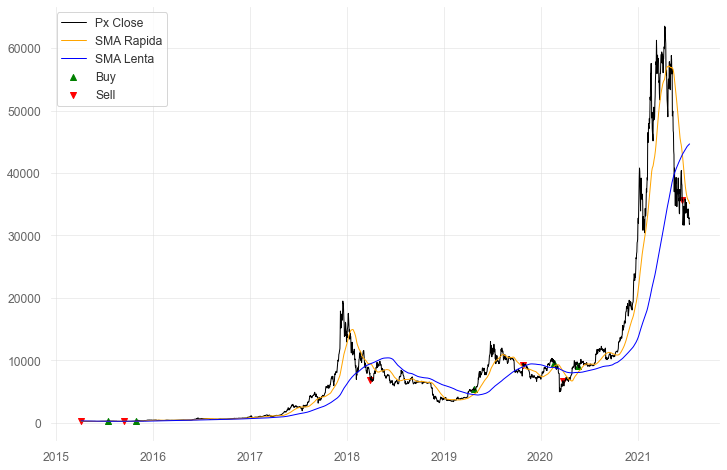

In [7]:
plot(df)

                           Strategy    Benchmark
-------------------------  ----------  -----------
Start Period               2015-04-03  2015-04-03
End Period                 2021-07-16  2021-07-16
Risk-Free Rate             0.0%        0.0%
Time in Market             100.0%      100.0%

Cumulative Return          2,717.42%   12,501.36%
CAGR%                      70.01%      115.73%

Sharpe                     0.91        1.17
Sortino                    1.33        1.75
Sortino/√2                 0.94        1.23

Max Drawdown               -80.74%     -83.4%
Longest DD Days            1149        1079
Volatility (ann.)          61.87%      61.8%
R^2                        0.37        0.37
Calmar                     0.87        1.39
Skew                       -0.17       -0.13
Kurtosis                   7.8         7.83

Expected Daily %           0.15%       0.21%
Expected Monthly %         4.49%       6.57%
Expected Yearly %          61.11%      99.55%
Kelly Criterion            7.

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2017-12-17,2020-05-07,2021-02-08,1149,-80.73726,-79.70784
2,2015-04-15,2015-10-28,2016-06-13,425,-56.01744,-53.78985
3,2021-04-14,2021-06-08,2021-07-16,93,-47.29006,-47.15137
4,2017-09-02,2017-09-14,2017-10-12,40,-35.50810,-26.76057
5,2017-06-12,2017-07-16,2017-08-05,54,-34.76173,-32.42780


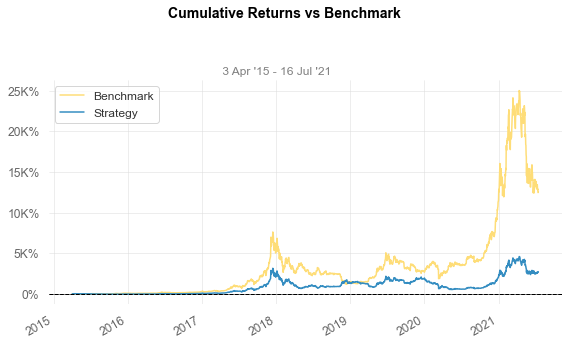

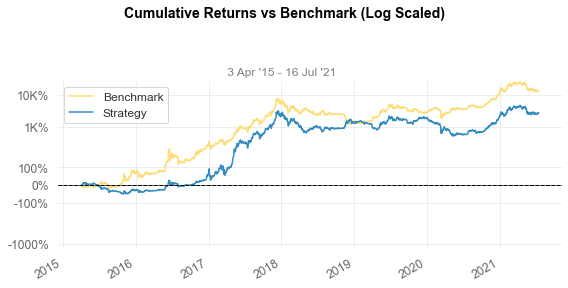

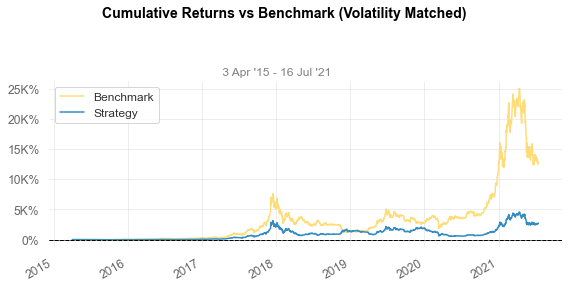

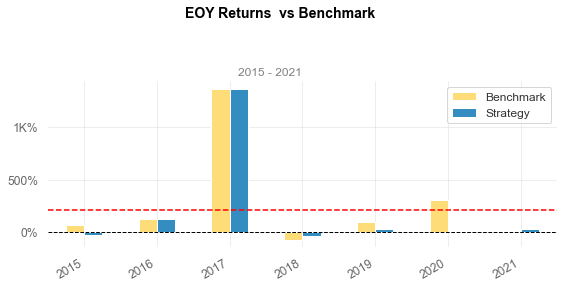

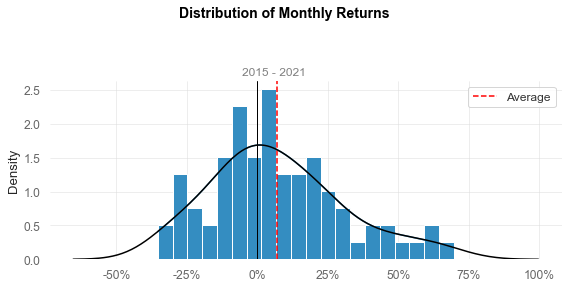

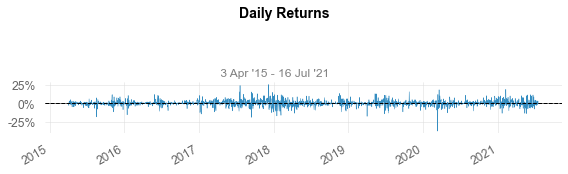

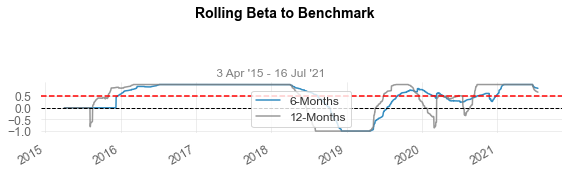

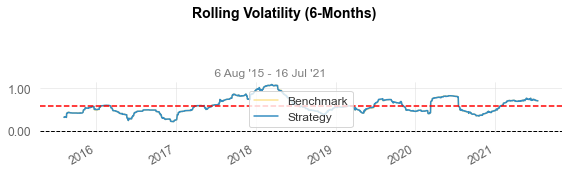

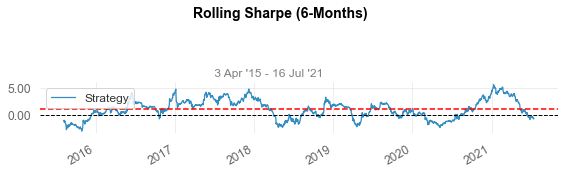

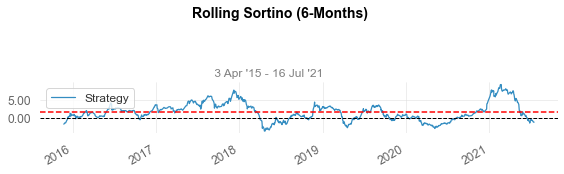

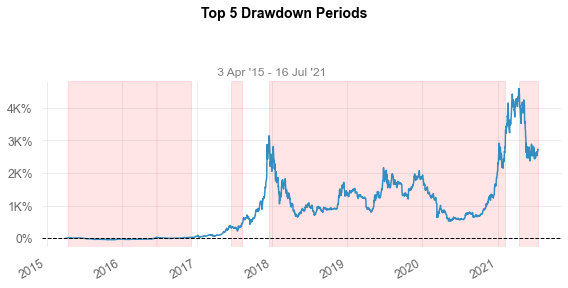

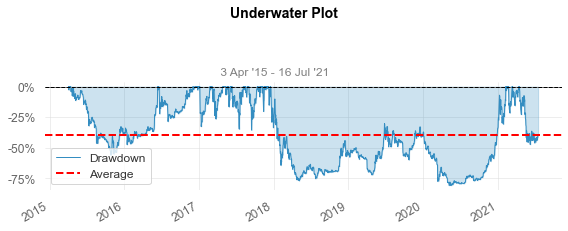

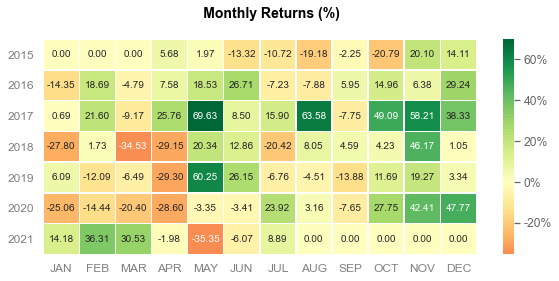

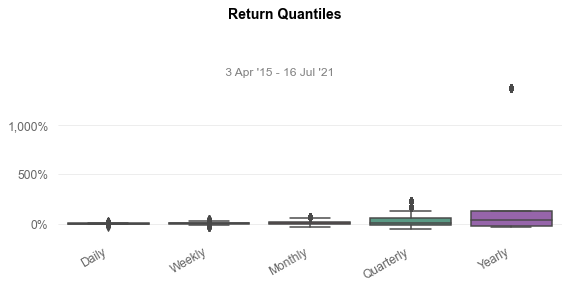

In [8]:
qs.reports.full(df.Estrategia, df.Return)